<a href="https://colab.research.google.com/github/WhiteBeyond/AI/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
%cd /content/drive/MyDrive/MidTerm/Money

/content/drive/MyDrive/MidTerm/Money


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [5]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/MidTerm/Money/Train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 1805 images belonging to 9 classes.


In [6]:
training_set.class_indices

{'1.000': 0,
 '10.000': 1,
 '100.000': 2,
 '2.000': 3,
 '20.000': 4,
 '200.000': 5,
 '5.000': 6,
 '50.000': 7,
 '500.000': 8}

In [7]:
# Tạo ra mạng CNN để train mô hình

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same', input_shape=(100,100, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', kernel_initializer='he_uniform', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))



model.add(Flatten())  

model.add(Dense(128, activation='linear', kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))

# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [8]:
history = model.fit(training_set, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
57/57 [==============================] - 267s 5s/step - loss: 2.4107 - accuracy: 0.3773
Epoch 2/20
57/57 [==============================] - 59s 1s/step - loss: 0.7842 - accuracy: 0.7042
Epoch 3/20
57/57 [==============================] - 68s 1s/step - loss: 0.4821 - accuracy: 0.8238
Epoch 4/20
57/57 [==============================] - 59s 1s/step - loss: 0.3075 - accuracy: 0.8936
Epoch 5/20
57/57 [==============================] - 59s 1s/step - loss: 0.2818 - accuracy: 0.8992
Epoch 6/20
57/57 [==============================] - 59s 1s/step - loss: 0.1965 - accuracy: 0.9313
Epoch 7/20
57/57 [==============================] - 59s 1s/step - loss: 0.1315 - accuracy: 0.9524
Epoch 8/20
57/57 [==============================] - 59s 1s/step - loss: 0.0764 - accuracy: 0.9729
Epoch 9/20
57/57 [==============================] - 59s 1s/step - loss: 0.0859 - accuracy: 0.9690
Epoch 10/20
57/57 [==============================] - 57s 1s/step - loss: 0.1273 - accuracy: 0.9562
Epoch 11/20
57/57 

In [9]:
model.save('/content/drive/MyDrive/MidTerm/Money/Money_model.h5')

In [10]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.004495167173445225
Train Accuracy 0.9988919496536255


<function matplotlib.pyplot.show(close=None, block=None)>

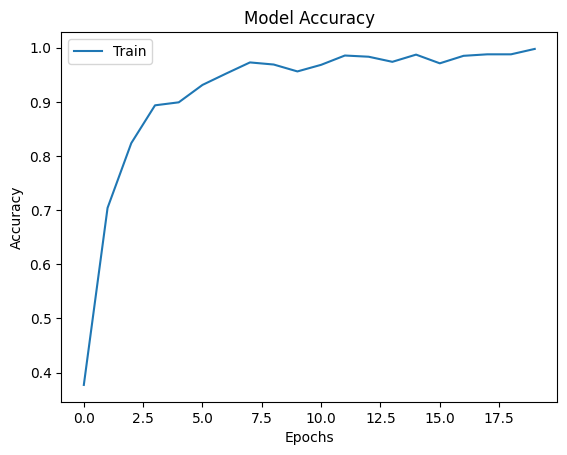

In [11]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [12]:
model1= load_model('/content/drive/MyDrive/MidTerm/Money/Money_model.h5')

1/1 [==============================] - 0s 256ms/step
1.000


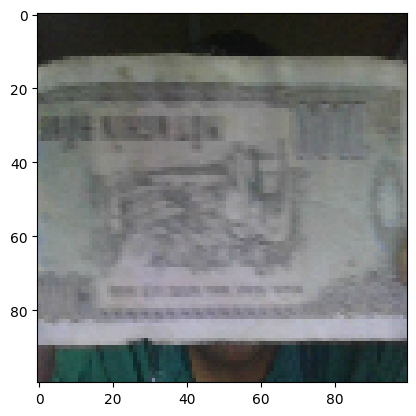

1/1 [==============================] - 0s 31ms/step
2.000


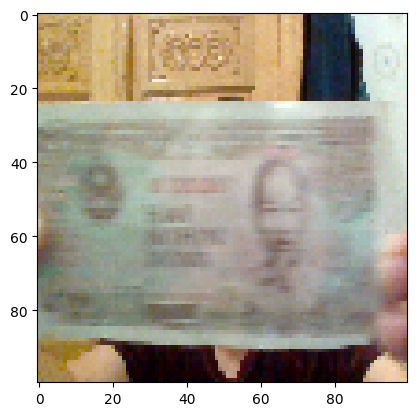

1/1 [==============================] - 0s 31ms/step
20.000


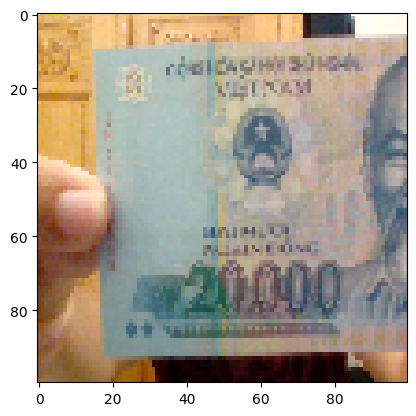

1/1 [==============================] - 0s 38ms/step
200.000


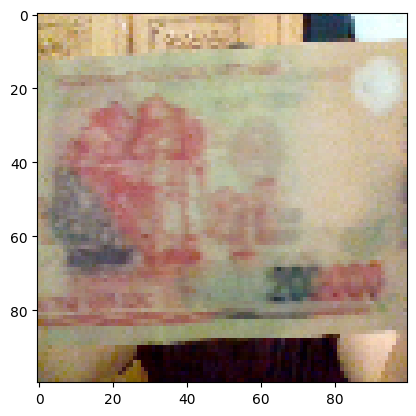

1/1 [==============================] - 0s 30ms/step
50.000


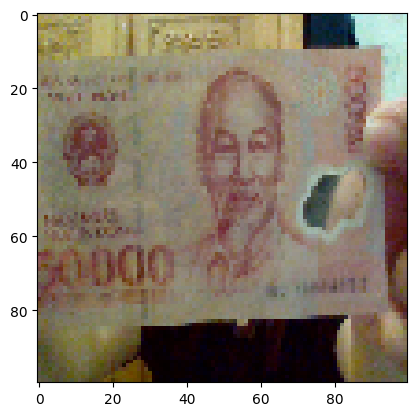

1/1 [==============================] - 0s 30ms/step
100.000


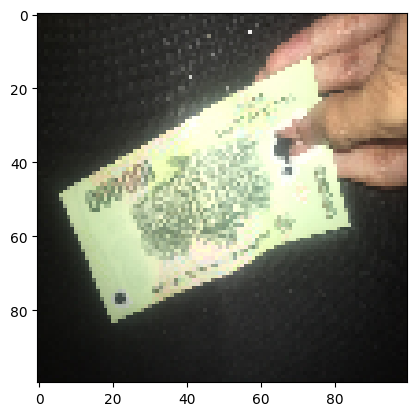

1/1 [==============================] - 0s 31ms/step
1.000


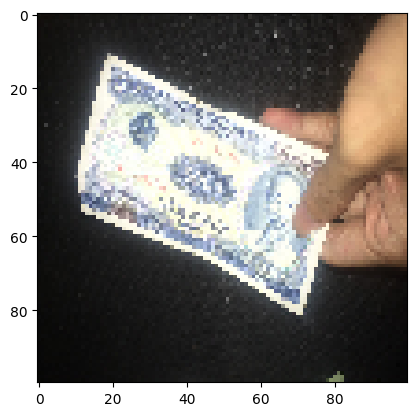

1/1 [==============================] - 0s 30ms/step
1.000


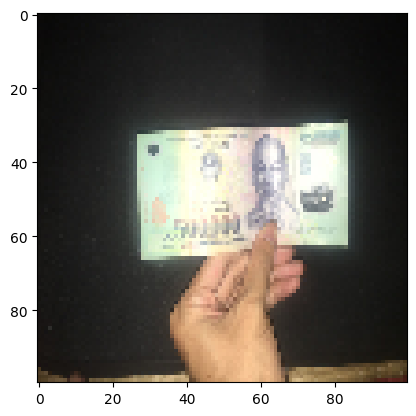

1/1 [==============================] - 0s 30ms/step
10.000


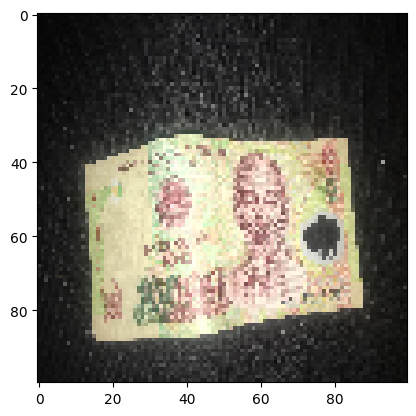

In [14]:
Test="/content/drive/MyDrive/MidTerm/Money/Test"

for i in os.listdir(Test):
  img=load_img(Test+'/'+i,target_size=(100,100))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['1.000', '10.000', '100.000', '2.000', '20.000', '200.000', '5.000', '50.000', '500.000']
  print(class_name[result])
  plt.show()

